In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.float_format', lambda x: '%0.3f' % x)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('Latest_CV_DATA(2).csv',encoding='latin-1')

In [3]:
df.head()

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKEYEAR,CLEANEDMake,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING CAPACITY,SOLDAMOUNT,STATE_MAPPED,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER SEGMENT,Meter_Reading
0,1,S20091800155,26-11-2020,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,Gujarat,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000
1,2,S21092900303,09-11-2021,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TamilNadu,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000
2,3,MKTCV1,01-01-2022,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,231646,Madhya Pradesh,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1112310.000
3,4,MKTCV2,01-01-2021,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,Bihar,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000
4,5,MKTCV3,01-01-2022,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,Haryana,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000


In [4]:
df['STATE_MAPPED'].value_counts()

TamilNadu                 69602
Andhra Pradesh            69350
Karnataka                 38034
Maharashtra               23227
UttarPradesh              19787
Chandigarh                12064
Gujarat                   11929
Rajasthan                 11883
Madhya Pradesh            11655
Kerala                    10798
WestBengal                 9037
Haryana                    8127
Himachal Pradesh           5762
Jharkhand                  5605
ODISHA                     5278
Bihar                      5205
Assam                      5143
Puducherry                 5081
Delhi                      4516
Jammu & Kashmir            4326
Punjab                     4247
Uttarakhand                4011
Nagaland                   3717
Goa                        3545
Tripura                    3493
Dadar And Nagar Haveli     3492
Mizoram                    3419
Arunachal Pradesh          3419
Sikkim                     3417
Meghalaya                  3411
Telangana                  3409
Lakshadw

In [5]:
df['STATE_MAPPED'].replace({'TamilNadu': 'TAMILNADU', 'Rajasthan': 'RAJASTHAN','Delhi':'DELHI','Goa':'GOA','Maharashtra':'MAHARASHTRA','Karnataka':'KARNATAKA','Puducherry':'PUDUCHERRY','Haryana':'HARYANA','Daman And Diu':'Daman and Diu','Bihar':'BIHAR','GUJARAT':'Gujarat','Uttarakhand':'UTTARAKHAND','Kerala':'KERALA','Jharkhand':'JHARKHAND'},inplace = True)
                           

In [6]:
df['STATE_MAPPED'].value_counts()

TAMILNADU                 69687
Andhra Pradesh            69350
KARNATAKA                 38190
MAHARASHTRA               23247
UttarPradesh              19787
RAJASTHAN                 12377
Gujarat                   12284
Chandigarh                12064
Madhya Pradesh            11655
KERALA                    11478
WestBengal                 9037
HARYANA                    8326
JHARKHAND                  5870
Himachal Pradesh           5762
PUDUCHERRY                 5604
BIHAR                      5402
ODISHA                     5278
Assam                      5143
DELHI                      4517
UTTARAKHAND                4476
Jammu & Kashmir            4326
Punjab                     4247
Nagaland                   3717
GOA                        3552
Tripura                    3493
Dadar And Nagar Haveli     3492
Arunachal Pradesh          3419
Mizoram                    3419
Daman and Diu              3418
Sikkim                     3417
Meghalaya                  3411
Telangan

In [7]:
df['SELLER SEGMENT'].value_counts()

Insurance    142444
RETAIL       130957
OEM           73604
Leasing       40274
BANK&NBFC     16611
Name: SELLER SEGMENT, dtype: int64

In [8]:
data=df.copy()

In [9]:
data.shape

(403890, 30)

In [10]:
def uppper(df,col):
    df[col]=df[col].str.upper()
    df[col]=df[col].str.replace(' ','')
    return df[col]

In [11]:
def encoding(data,col,col_1,model):
    print(model.head())
    temp = pd.read_csv(data+'.csv',encoding='CP1252')
    temp[col]=uppper(temp,col)
    model_temp = pd.DataFrame()
    labels_temp_map = dict(zip(temp[col],temp['Id (Encoding)']))
    model_temp[col_1] = model[col_1].map(labels_temp_map)
    print(model.head())
    return model_temp[col_1]

In [12]:
def df_reset(df):
    return pd.DataFrame()

In [13]:
data.rename(columns={'CLEANEDMake':'Make_Clean'},inplace=True)
data.rename(columns={'CLEANEDModel':'Model_Clean'},inplace=True)
data.rename(columns={'CLEANEDVariant':'Variant_Clean'},inplace=True)

In [14]:
data.rename(columns={'CLEANEDfueltype':'Fuel_Clean'},inplace=True)
data.rename(columns={'STATE_MAPPED':'CV_State_Clean'},inplace=True)
data.rename(columns={'MAKEYEAR':'MAKE_YEAR'},inplace=True)

In [15]:
data['Make_Clean']=uppper(data,'Make_Clean')
data['Model_Clean']=uppper(data,'Model_Clean')
data['Variant_Clean']=uppper(data,'Variant_Clean')
data['Fuel_Clean']=uppper(data,'Fuel_Clean')
data['CV_State_Clean']=uppper(data,'CV_State_Clean')

In [16]:
data.isnull().sum()

SRNO                                   0
UNIQUESERIALNO                         0
SOLD_DATE                              0
MAKE_YEAR                              0
Make_Clean                             0
Model_Clean                            0
Variant_Clean                          0
Fuel_Clean                             1
mixmmvfuelcleaned                      0
BODYTYPE                               0
SUBBODYTYPE                            0
CLEANEDWHEEL                           0
CLEANEDGVW/SEATING CAPACITY           10
SOLDAMOUNT                             0
CV_State_Clean                         0
VEHICLENO                         113878
METERREADING                      291934
UCR                               115772
SHROTCOND_MAPPED                       4
INSDT                                591
TAX                                   85
PERMIT_MAPPED                      10636
SELLERCORPORATENAME               173054
SELLERID                          113883
SELLERNAME      

In [17]:
dt = data.dropna(how='any',axis=0,subset=['Model_Clean','Fuel_Clean','Variant_Clean'])

In [18]:
dt

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER SEGMENT,Meter_Reading
0,1,S20091800155,26-11-2020,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000
1,2,S21092900303,09-11-2021,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000
2,3,MKTCV1,01-01-2022,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,231646,MADHYAPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1112310.000
3,4,MKTCV2,01-01-2021,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,BIHAR,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000
4,5,MKTCV3,01-01-2022,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,HARYANA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403885,387294,MKTCV113870,01-01-2021,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6923303,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000
403886,387295,MKTCV113871,01-01-2020,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7287688,TRIPURA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,56950.000
403887,387296,MKTCV113872,01-01-2022,2021,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7287688,UTTARPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,118830.000
403888,387297,MKTCV113873,01-01-2021,2021,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7671250,GUJARAT,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,56780.000


In [19]:
dt['Fuel_Clean'].unique()

array(['DIESEL', 'CNG', 'PETROL', 'ELECTRIC', 'LPG'], dtype=object)

In [20]:
dt['MMV']= dt['Make_Clean']+'_'+dt['Model_Clean']+'_'+dt['Variant_Clean']

In [21]:
df_1= dt.copy()

In [22]:
df_1.shape

(403889, 31)

In [23]:
df_1['SOLDAMOUNT'].min()

33

In [24]:
df_1['SOLDAMOUNT'].max()

9728000

In [25]:
#Sampling
df_2 = df_1[df_1['SOLDAMOUNT']>50000] 

In [26]:
df_2.shape

(361005, 31)

In [27]:
df_3 = df_2[df_2['MMV'].map(df_2['MMV'].value_counts()) >=10]

In [28]:
df_3.shape

(360750, 31)

In [29]:
df_3

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER SEGMENT,Meter_Reading,MMV
0,1,S20091800155,26-11-2020,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000,AMW_2516HL_6X2CARGOTRUCK
1,2,S21092900303,09-11-2021,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000,AMW_2516HL_6X2CARGOTRUCK
2,3,MKTCV1,01-01-2022,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,231646,MADHYAPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1112310.000,AMW_2516HL_6X2CARGOTRUCK
3,4,MKTCV2,01-01-2021,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,BIHAR,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000,AMW_2516HL_6X2CARGOTRUCK
4,5,MKTCV3,01-01-2022,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,HARYANA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000,AMW_2516HL_6X2CARGOTRUCK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403885,387294,MKTCV113870,01-01-2021,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6923303,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000,VOLVO_FM440_6X4TRUCKTRACTOR
403886,387295,MKTCV113871,01-01-2020,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7287688,TRIPURA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,56950.000,VOLVO_FM440_6X4TRUCKTRACTOR
403887,387296,MKTCV113872,01-01-2022,2021,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7287688,UTTARPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,118830.000,VOLVO_FM440_6X4TRUCKTRACTOR
403888,387297,MKTCV113873,01-01-2021,2021,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7671250,GUJARAT,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,56780.000,VOLVO_FM440_6X4TRUCKTRACTOR


In [30]:
df_1 =df_reset(df_1)

In [31]:
df_2 = df_reset(df_2)

In [32]:
df = df_3.copy()

In [33]:
#Data Preprocessing
df_1 = df[df['MAKE_YEAR']>=2005]

In [34]:
df_1.shape

(332442, 31)

In [35]:
df_1

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER SEGMENT,Meter_Reading,MMV
0,1,S20091800155,26-11-2020,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000,AMW_2516HL_6X2CARGOTRUCK
1,2,S21092900303,09-11-2021,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000,AMW_2516HL_6X2CARGOTRUCK
2,3,MKTCV1,01-01-2022,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,231646,MADHYAPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1112310.000,AMW_2516HL_6X2CARGOTRUCK
3,4,MKTCV2,01-01-2021,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,BIHAR,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000,AMW_2516HL_6X2CARGOTRUCK
4,5,MKTCV3,01-01-2022,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,243837,HARYANA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,1050260.000,AMW_2516HL_6X2CARGOTRUCK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403885,387294,MKTCV113870,01-01-2021,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6923303,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000,VOLVO_FM440_6X4TRUCKTRACTOR
403886,387295,MKTCV113871,01-01-2020,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7287688,TRIPURA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,56950.000,VOLVO_FM440_6X4TRUCKTRACTOR
403887,387296,MKTCV113872,01-01-2022,2021,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7287688,UTTARPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,118830.000,VOLVO_FM440_6X4TRUCKTRACTOR
403888,387297,MKTCV113873,01-01-2021,2021,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,7671250,GUJARAT,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,56780.000,VOLVO_FM440_6X4TRUCKTRACTOR


In [36]:
df_1.SOLD_DATE=pd.to_datetime(df_1.SOLD_DATE)

In [37]:
df_1["Year_sell"] = df_1.SOLD_DATE.dt.year

In [38]:
df_1["Sell_Month"] = df_1.SOLD_DATE.dt.month

In [39]:
df_1["Sell_Day"] = df_1.SOLD_DATE.dt.day

In [40]:
df_1["CV_Age"] = df_1["Year_sell"] - df_1['MAKE_YEAR']

In [41]:
df_2 = df_1[df_1["CV_Age"]>0]

In [42]:
df_2.shape

(314379, 35)

In [45]:
df_2.columns

Index(['SRNO', 'UNIQUESERIALNO', 'SOLD_DATE', 'MAKE_YEAR', 'Make_Clean',
       'Model_Clean', 'Variant_Clean', 'Fuel_Clean', 'mixmmvfuelcleaned',
       'BODYTYPE', 'SUBBODYTYPE', 'CLEANEDWHEEL',
       'CLEANEDGVW/SEATING CAPACITY', 'SOLDAMOUNT', 'CV_State_Clean',
       'VEHICLENO', 'METERREADING', 'UCR', 'SHROTCOND_MAPPED', 'INSDT', 'TAX',
       'PERMIT_MAPPED', 'SELLERCORPORATENAME', 'SELLERID', 'SELLERNAME',
       'KEYREFNUMBER', 'INV_H_RC_STATUS_CLEANED_MAPPED', 'Vehicle_Codition',
       'SELLER SEGMENT', 'Meter_Reading', 'MMV', 'Year_sell', 'Sell_Month',
       'Sell_Day', 'CV_Age', 'METER_READING_cleaned'],
      dtype='object')

In [106]:
#df_2['METER_READING_cleaned'] = df_2['Meter_Reading'].str.replace(r'[^\d.]+""', '')

In [47]:
df_2['Meter_Reading']=pd.to_numeric(df_2['Meter_Reading'],errors='coerce')

In [48]:
df_2['Meter_Reading'].describe()

count    314358.000
mean     308694.510
std      237449.040
min        4300.000
25%      133770.000
50%      214540.000
75%      429420.000
max     1112310.000
Name: Meter_Reading, dtype: float64

In [49]:
meter_reading_upper=df_2['Meter_Reading'].mean()+3*df_2['Meter_Reading'].std()
meter_reading_upper

1021041.630902892

In [50]:
df_2=df_2[~(df_2['Meter_Reading']>meter_reading_upper)]

In [51]:
df_2.shape

(312606, 36)

In [52]:
df_2['Meter_Reading'].describe()

count    312585.000
mean     304417.240
std      231199.849
min        4300.000
25%      133420.000
50%      212450.000
75%      429420.000
max     1020850.000
Name: Meter_Reading, dtype: float64

In [51]:
#df_2['METER_READING_cleaned'] = df_2['METER_READING_cleaned'].replace(0, np.nan)

In [52]:
#df_2['METER_READING_cleaned'].describe()

count      82275.000
mean      148413.741
std       287584.615
min            1.000
25%        61321.500
50%       105257.000
75%       168857.000
max     31659461.000
Name: METER_READING_cleaned, dtype: float64

In [53]:
#df_2['METER_READING_cleaned']=df_2['METER_READING_cleaned'].fillna(df_2['METER_READING_cleaned'].mean())# "Mean"

In [53]:
df_2.isnull().sum()/len(df_2)

SRNO                             0.000
UNIQUESERIALNO                   0.000
SOLD_DATE                        0.000
MAKE_YEAR                        0.000
Make_Clean                       0.000
Model_Clean                      0.000
Variant_Clean                    0.000
Fuel_Clean                       0.000
mixmmvfuelcleaned                0.000
BODYTYPE                         0.000
SUBBODYTYPE                      0.000
CLEANEDWHEEL                     0.000
CLEANEDGVW/SEATING CAPACITY      0.000
SOLDAMOUNT                       0.000
CV_State_Clean                   0.000
VEHICLENO                        0.277
METERREADING                     0.713
UCR                              0.278
SHROTCOND_MAPPED                 0.000
INSDT                            0.001
TAX                              0.000
PERMIT_MAPPED                    0.026
SELLERCORPORATENAME              0.453
SELLERID                         0.277
SELLERNAME                       0.277
KEYREFNUMBER             

In [116]:
df_2.columns=[c.replace(" ","_")for c in df_2.columns]

In [117]:
df_2.to_csv('Latest_Final_CV_CS.csv')

In [118]:
df_2

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING_CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER_SEGMENT,Meter_Reading,MMV,Year_sell,Sell_Month,Sell_Day,CV_Age,METER_READING_cleaned
0,1,S20091800155,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000,AMW_2516HL_6X2CARGOTRUCK,2020,11,26,7,246368
1,2,S21092900303,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000,AMW_2516HL_6X2CARGOTRUCK,2021,9,11,11,NaN
2,6,MKTCV4,2020-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,PUNJAB,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2020,1,1,15,NaN
3,7,MKTCV5,2021-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,ANDHRAPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2021,1,1,15,NaN
4,8,MKTCV6,2022-01-01,2007,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2022,1,1,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312601,387289,MKTCV113865,2021-01-01,2019,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6248281,DADARANDNAGARHAVELI,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,181050.000,VOLVO_FM440_6X4TRUCKTRACTOR,2021,1,1,2,NaN
312602,387291,MKTCV113867,2020-01-01,2019,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6577138,BIHAR,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000,VOLVO_FM440_6X4TRUCKTRACTOR,2020,1,1,1,NaN
312603,387292,MKTCV113868,2022-01-01,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6577138,HARYANA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,181050.000,VOLVO_FM440_6X4TRUCKTRACTOR,2022,1,1,2,NaN
312604,387294,MKTCV113870,2021-01-01,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6923303,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000,VOLVO_FM440_6X4TRUCKTRACTOR,2021,1,1,1,NaN


In [119]:
df_2['Meter_Reading'].min()

4300.0

In [120]:
df_2[df_2['Meter_Reading']>=4300]

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING_CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER_SEGMENT,Meter_Reading,MMV,Year_sell,Sell_Month,Sell_Day,CV_Age,METER_READING_cleaned
0,1,S20091800155,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000,AMW_2516HL_6X2CARGOTRUCK,2020,11,26,7,246368
1,2,S21092900303,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000,AMW_2516HL_6X2CARGOTRUCK,2021,9,11,11,NaN
2,6,MKTCV4,2020-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,PUNJAB,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2020,1,1,15,NaN
3,7,MKTCV5,2021-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,ANDHRAPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2021,1,1,15,NaN
4,8,MKTCV6,2022-01-01,2007,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2022,1,1,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312601,387289,MKTCV113865,2021-01-01,2019,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6248281,DADARANDNAGARHAVELI,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,181050.000,VOLVO_FM440_6X4TRUCKTRACTOR,2021,1,1,2,NaN
312602,387291,MKTCV113867,2020-01-01,2019,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6577138,BIHAR,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000,VOLVO_FM440_6X4TRUCKTRACTOR,2020,1,1,1,NaN
312603,387292,MKTCV113868,2022-01-01,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6577138,HARYANA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,181050.000,VOLVO_FM440_6X4TRUCKTRACTOR,2022,1,1,2,NaN
312604,387294,MKTCV113870,2021-01-01,2020,VOLVO,FM440,6X4TRUCKTRACTOR,DIESEL,VOLVOFM4406X4TRUCKTRACTORDIESEL,TRACTOR TRAILER,22 WHEELS SEMI TRAILER- 10WHEELS DRIVE TRACTOR...,22,125000,6923303,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,Leasing,119000.000,VOLVO_FM440_6X4TRUCKTRACTOR,2021,1,1,1,NaN


In [121]:
pct_null = df_2.isnull().sum() / len(df_2)
missing_features = pct_null[pct_null > 0.70].index
# df.drop(missing_features, axis=1, inplace=True)

In [122]:
missing_features

Index(['METERREADING', 'METER_READING_cleaned'], dtype='object')

In [123]:
inp1=df_2.select_dtypes(exclude='object')

In [124]:
inp1.shape

(312606, 9)

In [125]:
inp1

,SRNO,SOLD_DATE,MAKE_YEAR,SOLDAMOUNT,Meter_Reading,Year_sell,Sell_Month,Sell_Day,CV_Age
0,1,2020-11-26,2013,445000,490620.000,2020,11,26,7
1,2,2021-09-11,2010,315000,736100.000,2021,9,11,11
2,6,2020-01-01,2005,256671,988210.000,2020,1,1,15
3,7,2021-01-01,2006,256671,988210.000,2021,1,1,15
4,8,2022-01-01,2007,256671,988210.000,2022,1,1,15
...,...,...,...,...,...,...,...,...,...
312601,387289,2021-01-01,2019,6248281,181050.000,2021,1,1,2
312602,387291,2020-01-01,2019,6577138,119000.000,2020,1,1,1
312603,387292,2022-01-01,2020,6577138,181050.000,2022,1,1,2
312604,387294,2021-01-01,2020,6923303,119000.000,2021,1,1,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


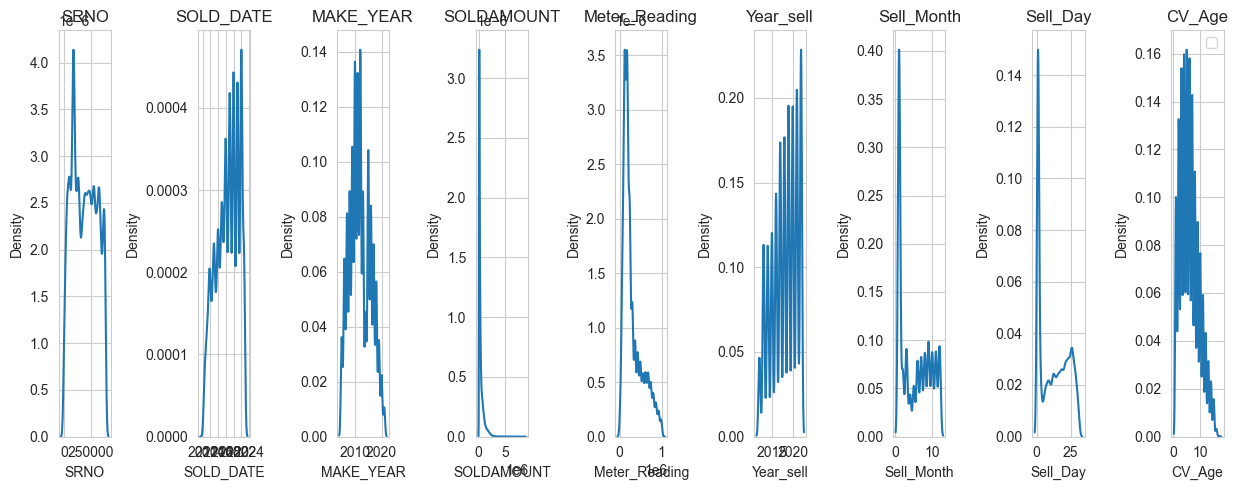

In [126]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(18,5))


for i,b in enumerate(list(inp1.columns)):
    
    i +=1
    ax = fig.add_subplot(1,13,i)
    sns.kdeplot(inp1[b])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

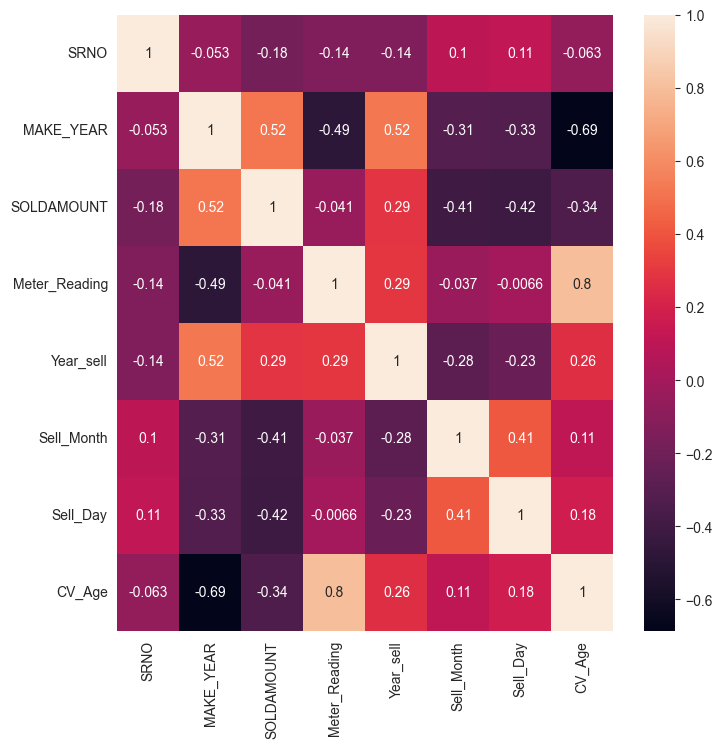

In [127]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,8))        # Size of the figure
sns.heatmap(inp1.corr(),annot = True)
plt.show()

In [128]:
df_2.shape

(312606, 36)

In [129]:
df_2.head()

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING_CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER_SEGMENT,Meter_Reading,MMV,Year_sell,Sell_Month,Sell_Day,CV_Age,METER_READING_cleaned
0,1,S20091800155,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000,AMW_2516HL_6X2CARGOTRUCK,2020,11,26,7,246368
1,2,S21092900303,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000,AMW_2516HL_6X2CARGOTRUCK,2021,9,11,11,NaN
2,6,MKTCV4,2020-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,PUNJAB,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2020,1,1,15,NaN
3,7,MKTCV5,2021-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,ANDHRAPRADESH,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2021,1,1,15,NaN
4,8,MKTCV6,2022-01-01,2007,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,KERALA,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2022,1,1,15,NaN


In [130]:
df_2.columns

Index(['SRNO', 'UNIQUESERIALNO', 'SOLD_DATE', 'MAKE_YEAR', 'Make_Clean',
       'Model_Clean', 'Variant_Clean', 'Fuel_Clean', 'mixmmvfuelcleaned',
       'BODYTYPE', 'SUBBODYTYPE', 'CLEANEDWHEEL',
       'CLEANEDGVW/SEATING_CAPACITY', 'SOLDAMOUNT', 'CV_State_Clean',
       'VEHICLENO', 'METERREADING', 'UCR', 'SHROTCOND_MAPPED', 'INSDT', 'TAX',
       'PERMIT_MAPPED', 'SELLERCORPORATENAME', 'SELLERID', 'SELLERNAME',
       'KEYREFNUMBER', 'INV_H_RC_STATUS_CLEANED_MAPPED', 'Vehicle_Codition',
       'SELLER_SEGMENT', 'Meter_Reading', 'MMV', 'Year_sell', 'Sell_Month',
       'Sell_Day', 'CV_Age', 'METER_READING_cleaned'],
      dtype='object')

In [131]:
columns=['SOLD_DATE', 'MAKE_YEAR', 'Make_Clean',
       'Model_Clean', 'Variant_Clean', 'Fuel_Clean',
       'BODYTYPE', 'SUBBODYTYPE', 'CLEANEDWHEEL',
       'CLEANEDGVW/SEATING CAPACITY', 'SOLDAMOUNT', 'CV_State_Clean',
       'VEHICLENO', 'Meter_Reading', 'UCR', 'SHROTCOND_MAPPED', 'INSDT', 'TAX',
       'PERMIT_MAPPED', 'SELLERCORPORATENAME', 'SELLERID', 'SELLERNAME',
       'KEYREFNUMBER', 'INV_H_RC_STATUS_CLEANED_MAPPED', 'Vehicle_Codition',
       'SELLER SEGMENT', 'MMV', 'Year_sell', 'Sell_Month', 'Sell_Day',
       'CV_Age']

In [132]:
#Feature Enginerring
df_2.reset_index(drop=True,inplace =True)

In [133]:
Model_data = df_2.copy()

In [134]:
Model_data.shape

(312606, 36)

In [135]:
Model_data.to_csv('Model_data_final_CV_CS.csv')

In [136]:
cat_f=Model_data.select_dtypes(include='object').columns

In [137]:
cat_f

Index(['UNIQUESERIALNO', 'Make_Clean', 'Model_Clean', 'Variant_Clean',
       'Fuel_Clean', 'mixmmvfuelcleaned', 'BODYTYPE', 'SUBBODYTYPE',
       'CLEANEDWHEEL', 'CLEANEDGVW/SEATING_CAPACITY', 'CV_State_Clean',
       'VEHICLENO', 'METERREADING', 'UCR', 'SHROTCOND_MAPPED', 'INSDT', 'TAX',
       'PERMIT_MAPPED', 'SELLERCORPORATENAME', 'SELLERID', 'SELLERNAME',
       'KEYREFNUMBER', 'INV_H_RC_STATUS_CLEANED_MAPPED', 'Vehicle_Codition',
       'SELLER_SEGMENT', 'MMV', 'METER_READING_cleaned'],
      dtype='object')

In [138]:
cat_f=['SOLD_DATE', 'MAKE_YEAR', 'Make_Clean',
       'Model_Clean', 'Variant_Clean', 'Fuel_Clean',
       'BODYTYPE', 'SUBBODYTYPE', 'CLEANEDWHEEL',
       'CLEANEDGVW/SEATING CAPACITY', 'SOLDAMOUNT', 'CV_State_Clean',
       'VEHICLENO', 'Meter_Reading', 'UCR', 'SHROTCOND_MAPPED', 'INSDT', 'TAX',
       'PERMIT_MAPPED', 'SELLERCORPORATENAME', 'SELLERID', 'SELLERNAME',
       'KEYREFNUMBER', 'INV_H_RC_STATUS_CLEANED_MAPPED', 'Vehicle_Codition',
       'SELLER SEGMENT', 'MMV', 'Year_sell', 'Sell_Month', 'Sell_Day',
       'CV_Age']

In [139]:
num_f=Model_data.select_dtypes(exclude='object').columns

In [140]:
num_f

Index(['SRNO', 'SOLD_DATE', 'MAKE_YEAR', 'SOLDAMOUNT', 'Meter_Reading',
       'Year_sell', 'Sell_Month', 'Sell_Day', 'CV_Age'],
      dtype='object')

In [141]:
inp1=Model_data.select_dtypes(exclude='object')

In [142]:
columns=Model_data.select_dtypes(exclude='object').columns

In [143]:
columns

Index(['SRNO', 'SOLD_DATE', 'MAKE_YEAR', 'SOLDAMOUNT', 'Meter_Reading',
       'Year_sell', 'Sell_Month', 'Sell_Day', 'CV_Age'],
      dtype='object')

In [144]:
inp_cat=Model_data.select_dtypes(include='object')

In [145]:
inp_cat.columns

Index(['UNIQUESERIALNO', 'Make_Clean', 'Model_Clean', 'Variant_Clean',
       'Fuel_Clean', 'mixmmvfuelcleaned', 'BODYTYPE', 'SUBBODYTYPE',
       'CLEANEDWHEEL', 'CLEANEDGVW/SEATING_CAPACITY', 'CV_State_Clean',
       'VEHICLENO', 'METERREADING', 'UCR', 'SHROTCOND_MAPPED', 'INSDT', 'TAX',
       'PERMIT_MAPPED', 'SELLERCORPORATENAME', 'SELLERID', 'SELLERNAME',
       'KEYREFNUMBER', 'INV_H_RC_STATUS_CLEANED_MAPPED', 'Vehicle_Codition',
       'SELLER_SEGMENT', 'MMV', 'METER_READING_cleaned'],
      dtype='object')

In [146]:
Model_data.fillna(Model_data.select_dtypes(include='number').median().iloc[0], inplace=True)

In [147]:
Model_data.fillna(Model_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [148]:
Model_data_= Model_data[['MAKE_YEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','SELLER_SEGMENT','Meter_Reading','SOLDAMOUNT']]

In [149]:
Model_data_.columns

Index(['MAKE_YEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean', 'Fuel_Clean',
       'CV_State_Clean', 'SELLER_SEGMENT', 'Meter_Reading', 'SOLDAMOUNT'],
      dtype='object')

In [150]:
X=Model_data_.drop(['SOLDAMOUNT'],axis=1)
y=Model_data_[['SOLDAMOUNT']]

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [153]:
ohe=OneHotEncoder()
ohe.fit(X[['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','SELLER_SEGMENT']])

OneHotEncoder()

In [160]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','SELLER_SEGMENT']),remainder='passthrough')

In [161]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['AMW', 'ASHOKLEYLAND', 'BAJAJTEMPO', 'BHARATBENZ', 'DECANAUTO',
       'EICHER', 'FORCE', 'FORCEMAN', 'HINDUSTAN', 'ICML', 'MAHINDRA',
       'MARUTISUZUKI', 'PIAGGIO', 'PREMIER', 'SCANIA', 'SMLISUZU',
       'SWARAJMAZDA', 'TATA', 'TOYOTA', 'URAL', 'VOLVO'], dtype=object),
                                                           array(['10.5...
       'PUDUCHERRY', 'PUNE', 'PUNJAB', 'PUNJABHPANDJK', 'RAJASTHAN',
       'SECUNDERABAD', 'SIKKIM', 'TAMILNADU', 'TELANGANA', 'TRICHY',
       'TRIPURA', 'UTTARAKHAND', 'UTTARPRADESH', 'VIJAYAWADA', 'WARANGAL',
       'WESTBENGAL'], dtype=object),
                                                           array(['BANK&NBFC', 'Insurance', 'Leasing', 'OEM', 'RETAIL'], dtype=object)]),
                                 ['Make_Clean', 'Model_Clean', 'Variant_Clean',
                       

In [162]:
from sklearn import model_selection
from xgboost import XGBRegressor

In [163]:
regressor=XGBRegressor(max_depth=15,learning_rate=0.01,
                   n_estimators=5000,
                   objective='reg:linear',
                   booster='gbtree')

In [164]:
pipe=make_pipeline(column_trans,regressor)

In [165]:
pipe.fit(X_train,y_train)

[17:00:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AMW', 'ASHOKLEYLAND', 'BAJAJTEMPO', 'BHARATBENZ', 'DECANAUTO',
       'EICHER', 'FORCE', 'FORCEMAN', 'HINDUSTAN', 'ICML', 'MAHINDRA',
       'MARUTISUZUKI', 'PIAGGIO', 'PREMIER', 'SCANIA', 'SMLISUZU',
       'SWARAJMAZDA', 'TATA', 'TOYOTA', 'URAL...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.01, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=15, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=5000, n_jobs=0, num_par

In [169]:
y_pred=pipe.predict(X_test)
y_pred

array([106089.52, 290482.3 , 414981.12, ...,  87372.2 , 419812.38,
        90027.06], dtype=float32)

In [170]:
y_train_pred=pipe.predict(X_train)
y_train_pred

array([145305.77, 428328.2 , 399291.22, ..., 612868.75, 146519.8 ,
       344265.44], dtype=float32)

In [171]:
r2_score(y_train,y_train_pred)

0.9742769646616426

In [172]:
r2_score(y_test,y_pred)

0.9635263294915511

In [173]:
import pickle

In [174]:
pickle.dump(pipe,open('FInal_regressor_CV_CS.pkl','wb'))

In [175]:
df_2.head(3)

,SRNO,UNIQUESERIALNO,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,mixmmvfuelcleaned,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CLEANEDGVW/SEATING_CAPACITY,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERCORPORATENAME,SELLERID,SELLERNAME,KEYREFNUMBER,INV_H_RC_STATUS_CLEANED_MAPPED,Vehicle_Codition,SELLER_SEGMENT,Meter_Reading,MMV,Year_sell,Sell_Month,Sell_Day,CV_Age,METER_READING_cleaned
0,1,S20091800155,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,445000,GUJARAT,GJ16Z6727,246368,20%,FAIR,Live : 28/02/2021,Expired : 30/09/2019,NOT AVAILABLE,a9,AP000337591,JAYESHBHAI ZAVERBHAI PATEL,BHARUO608090001,ORIGINAL RC,MOVABLE,RETAIL,490620.000,AMW_2516HL_6X2CARGOTRUCK,2020,11,26,7,246368
1,2,S21092900303,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,315000,TAMILNADU,TN22BT4664,NaN,0.2,FAIR,Live : 29/03/2022,Expired : 31/03/2021,NOT AVAILABLE,a9,AC000156811,CHINNAVELLAI CHINNAVELLAI,ARUPKT908140010,Original RC,IMMOVABLE,Insurance,736100.000,AMW_2516HL_6X2CARGOTRUCK,2021,9,11,11,NaN
2,6,MKTCV4,2020-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,AMW2516HL6X2CARGOTRUCKDIESEL,HAULAGE TRUCK,10 WHEELS / GVW 25000KG TO 28500KG /RIGID BODY,10,25000,256671,PUNJAB,NaN,NaN,40-50%,GOOD,LIVE,VALID,VALID,NaN,NaN,NaN,NaN,ORIGINAL RC,MOVABLE,OEM,988210.000,AMW_2516HL_6X2CARGOTRUCK,2020,1,1,15,NaN


In [176]:
pipe.predict(pd.DataFrame(columns=['MAKE_YEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','SELLER_SEGMENT','Meter_Reading'],data=np.array([2013,'AMW','2516HL','6X2CARGOTRUCK','DIESEL','GUJARAT','RETAIL',490620.000]).reshape(1,8)))

array([456227.78], dtype=float32)